# Exploratory data analysis on dataset of a educational video streaming platform
### Explore and analyse the given data sets to show the findings of the analysis.
### Data shows the occupation and country of each user along with the number of views each user has made on any given day.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)

In [50]:
import datetime

In [2]:
combined_datafile = pd.read_csv('Final_Combined.csv')

In [3]:
combined_datafile.shape

(546993, 10)

In [4]:
combined_datafile.dtypes

x                   int64
USER_ID             int64
DATE               object
NUMBER_OF_VIEWS     int64
COUNTRY_CODE       object
NAME_x             object
SUB_REGION         object
REGION             object
OCCUPATION_ID      object
NAME_y             object
dtype: object

In [5]:
combined_datafile.head(5)

,x,USER_ID,DATE,NUMBER_OF_VIEWS,COUNTRY_CODE,NAME_x,SUB_REGION,REGION,OCCUPATION_ID,NAME_y
0,0,1,4/15/2021,447,CN,China,Eastern Asia,Asia,5,Professor / Lecturer / PI
1,1,2,4/15/2021,13,AR,Argentina,Latin America and the Caribbean,Americas,5,Professor / Lecturer / PI
2,2,3,4/15/2021,21,DE,Germany,Western Europe,Europe,9,I'm just interested
3,3,5,4/15/2021,8,DE,Germany,Western Europe,Europe,1,Undergraduate Student
4,4,6,4/15/2021,17,ZA,South Africa,Sub-Saharan Africa,Africa,9,I'm just interested


In [9]:
#dropping the unnecessary columns which we will not use as part of the analysis
combined_datafile = combined_datafile.drop(['COUNTRY_CODE','OCCUPATION_ID'], axis=1)

In [10]:
combined_datafile.shape

(546993, 8)

In [11]:
combined_datafile.head()

,x,USER_ID,DATE,NUMBER_OF_VIEWS,NAME_x,SUB_REGION,REGION,NAME_y
0,0,1,4/15/2021,447,China,Eastern Asia,Asia,Professor / Lecturer / PI
1,1,2,4/15/2021,13,Argentina,Latin America and the Caribbean,Americas,Professor / Lecturer / PI
2,2,3,4/15/2021,21,Germany,Western Europe,Europe,I'm just interested
3,3,5,4/15/2021,8,Germany,Western Europe,Europe,Undergraduate Student
4,4,6,4/15/2021,17,South Africa,Sub-Saharan Africa,Africa,I'm just interested


In [12]:
#Renaming name and other columns to avoid 
combined_datafile = combined_datafile.rename(columns={"USER_ID":"user_id", "DATE":"date", "NUMBER_OF_VIEWS":"num_of_views", "NAME_x":"country",
                                                      "SUB_REGION":"sub_region", "REGION":"continent","NAME_y":"profession"})

In [14]:
combined_datafile.shape

(546993, 8)

In [16]:
combined_datafile.head(2)

,x,user_id,date,num_of_views,country,sub_region,continent,profession
0,0,1,4/15/2021,447,China,Eastern Asia,Asia,Professor / Lecturer / PI
1,1,2,4/15/2021,13,Argentina,Latin America and the Caribbean,Americas,Professor / Lecturer / PI


In [17]:
combined_datafile = combined_datafile.drop(['x'], axis =1)

In [18]:
combined_datafile.head(5)

,user_id,date,num_of_views,country,sub_region,continent,profession
0,1,4/15/2021,447,China,Eastern Asia,Asia,Professor / Lecturer / PI
1,2,4/15/2021,13,Argentina,Latin America and the Caribbean,Americas,Professor / Lecturer / PI
2,3,4/15/2021,21,Germany,Western Europe,Europe,I'm just interested
3,5,4/15/2021,8,Germany,Western Europe,Europe,Undergraduate Student
4,6,4/15/2021,17,South Africa,Sub-Saharan Africa,Africa,I'm just interested


In [19]:
combined_datafile.shape

(546993, 7)

In [20]:
combined_datafile.dtypes

user_id          int64
date            object
num_of_views     int64
country         object
sub_region      object
continent       object
profession      object
dtype: object

In [21]:
#Checking the data file for any duplicates
duplicate_data = combined_datafile[combined_datafile.duplicated()]

In [22]:
print("Number of duplicate rows are", duplicate_data.shape)

Number of duplicate rows are (0, 7)


In [ ]:
#No duplicate rows found in the data set - 7 columns left after removing unwanted columns from the dataframe

In [24]:
#Check if the data has any null values inside - We have already replaced null values within the data with suitable values
combined_datafile.isnull().sum()

user_id         0
date            0
num_of_views    0
country         0
sub_region      0
continent       0
profession      0
dtype: int64

<AxesSubplot:xlabel='num_of_views'>

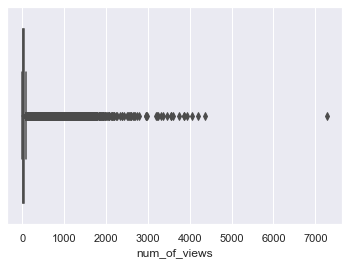

In [136]:
sns.boxplot(x=combined_datafile['num_of_views'])

## using the box plot on the no of views column we can see that most of the (total views in a day) are below the 3000 range. Outliers shown above have not been removed

<AxesSubplot:xlabel='clean_occu_id'>

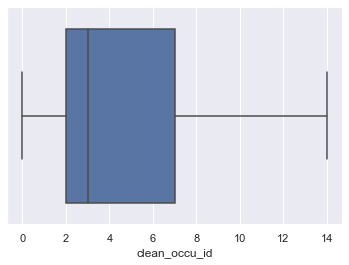

In [137]:
sns.boxplot(x=combined_datafile['clean_occu_id'])

In [27]:
#By this we get that the 75% of the views are equal to or less than 35 with the maximum being 3933
combined_datafile.describe()

,user_id,num_of_views
count,546993.000000,546993.000000
mean,88057.475584,34.294037
std,55428.079544,78.031069
min,1.000000,0.000000
25%,39890.000000,4.000000
50%,83746.000000,12.000000
75%,131934.000000,34.000000
max,205097.000000,7276.000000


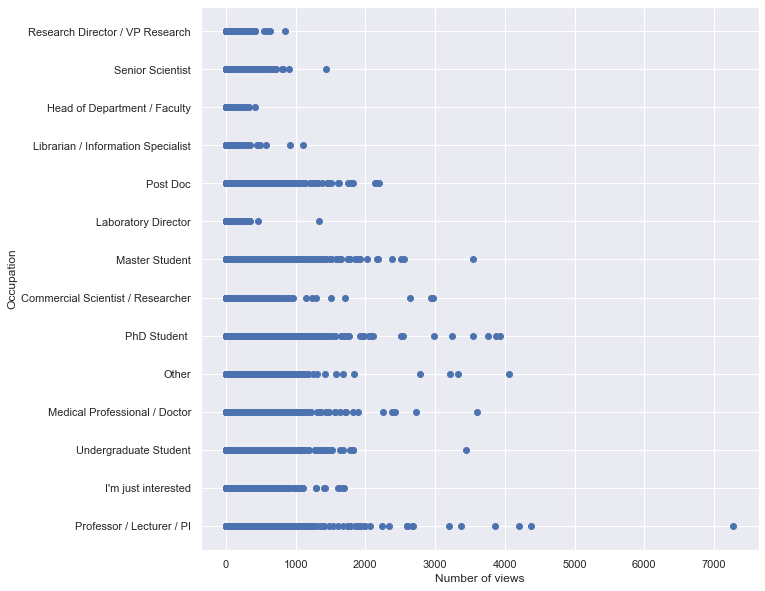

In [35]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(combined_datafile['num_of_views'], combined_datafile['profession'])
ax.set_xlabel('Number of views')
ax.set_ylabel('Occupation')
plt.show()

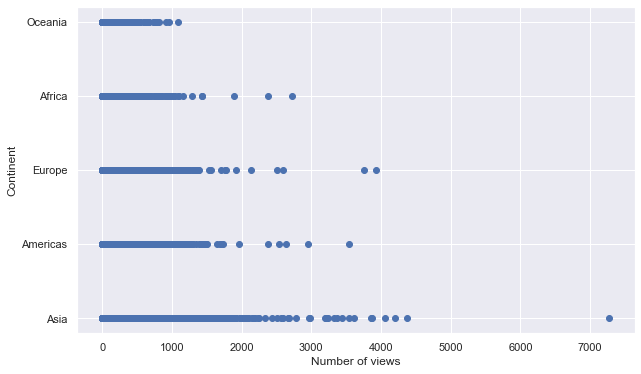

In [38]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(combined_datafile['num_of_views'], combined_datafile['continent'])
ax.set_xlabel('Number of views')
ax.set_ylabel('Continent')
plt.show()

# Above scatterplot shows the Correlation between number of views and continents - Number of views are highest in Asia followed by Americas and then other continents

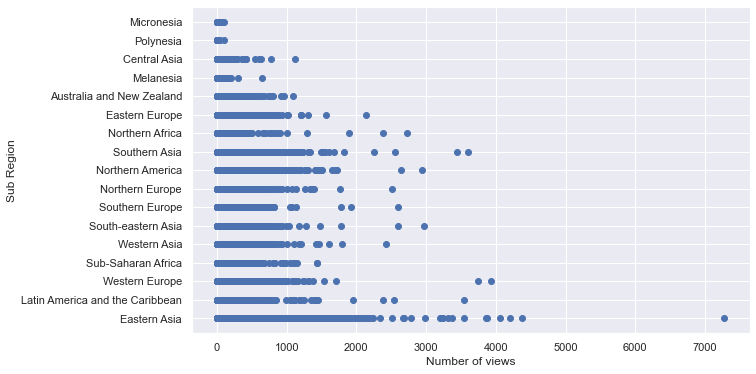

In [37]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(combined_datafile['num_of_views'], combined_datafile['sub_region'])
ax.set_xlabel('Number of views')
ax.set_ylabel('Sub Region')
plt.show()

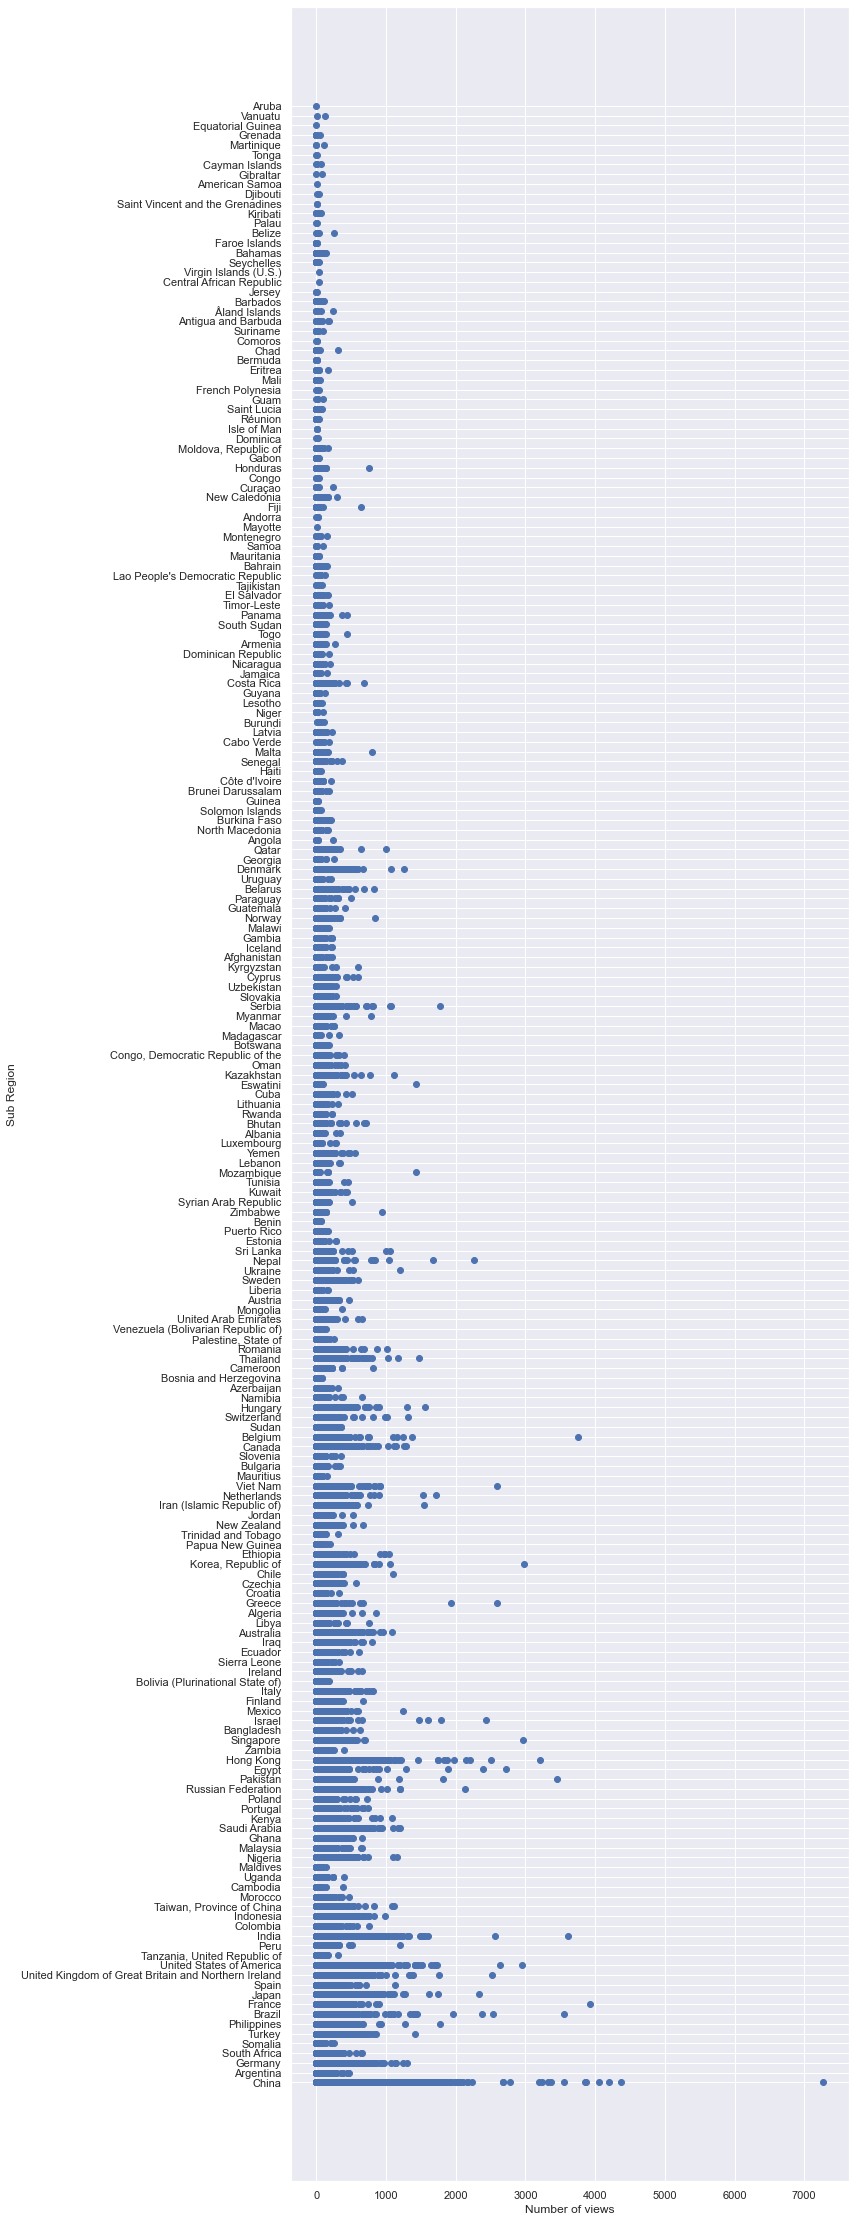

In [47]:
#Number of views country wise to get an understanding of distribution of views per country
fig, ax = plt.subplots(figsize=(10,40))
ax.scatter(combined_datafile['num_of_views'], combined_datafile['country'])
ax.set_xlabel('Number of views')
ax.set_ylabel('Sub Region')
plt.show()

# The above scatter plot shows that the maximum number of views are coming from the East Asian and South Asian countries like China, India, HongKong and North American countries like United states of America, etc

In [52]:
combined_datafile['month'] = pd.DatetimeIndex(combined_datafile['date']).month

In [58]:
combined_datafile.to_csv("combined_month_name.csv")

In [61]:
combined_datafile = pd.read_csv("combined_month_name.csv")

In [163]:
combined_datafile.head(2)

,user_id,date,num_of_views,country,sub_region,continent,month,month_name,Occupation_id,clean_occu_id,profession,continent_encoded,sub_region_encoded
0,1,4/15/2021,447,China,Eastern Asia,Asia,4,April,5.0,5,Professor / Lecturer / PI,2,2
1,2,4/15/2021,13,Argentina,Latin America and the Caribbean,Americas,4,April,5.0,5,Professor / Lecturer / PI,1,4


In [70]:
month_name = combined_datafile['month_name']
number_of_views = combined_datafile['num_of_views']
fig = plt.figure(figsize =(10, 10))
plt.bar(month_name, number_of_views)
plt.show()

,user_id,num_of_views,month,Occupation_id,clean_occu_id,continent_encoded,sub_region_encoded
user_id,1.000000,-0.001403,0.713432,-0.009318,-0.004144,0.011468,-0.007181
num_of_views,-0.001403,1.000000,-0.009281,0.003423,-0.017169,0.021726,-0.036941
month,0.713432,-0.009281,1.000000,0.003148,-0.008366,0.037354,-0.051430
Occupation_id,-0.009318,0.003423,0.003148,1.000000,-0.016793,-0.004577,0.001154
clean_occu_id,-0.004144,-0.017169,-0.008366,-0.016793,1.000000,0.018011,0.013335
continent_encoded,0.011468,0.021726,0.037354,-0.004577,0.018011,1.000000,-0.048493
sub_region_encoded,-0.007181,-0.036941,-0.051430,0.001154,0.013335,-0.048493,1.000000


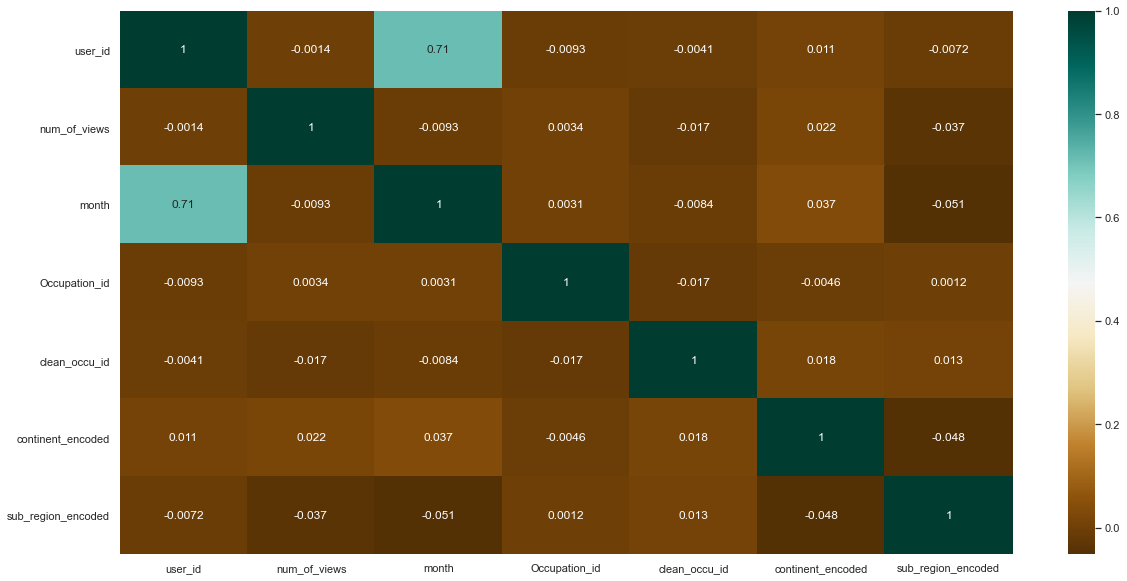

In [161]:
plt.figure(figsize=(20,10))
c= combined_datafile.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

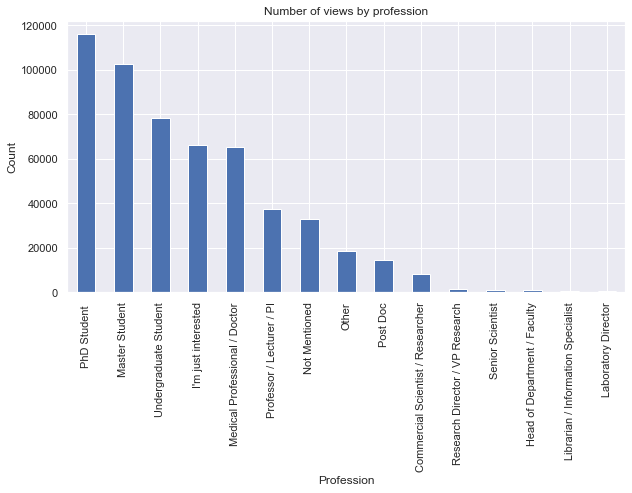

In [162]:
combined_datafile.profession.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Number of views by profession')
plt.ylabel('Count')
plt.xlabel('Profession');

In [95]:
combined_datafile.head(10)

,user_id,date,num_of_views,country,sub_region,continent,profession,month,month_name
0,1,4/15/2021,447,China,Eastern Asia,Asia,Professor / Lecturer / PI,4,April
1,2,4/15/2021,13,Argentina,Latin America and the Caribbean,Americas,Professor / Lecturer / PI,4,April
2,3,4/15/2021,21,Germany,Western Europe,Europe,I'm just interested,4,April
3,5,4/15/2021,8,Germany,Western Europe,Europe,Undergraduate Student,4,April
4,6,4/15/2021,17,South Africa,Sub-Saharan Africa,Africa,I'm just interested,4,April
5,8,4/15/2021,18,China,Eastern Asia,Asia,Undergraduate Student,4,April
6,10,4/15/2021,22,Somalia,Sub-Saharan Africa,Africa,Medical Professional / Doctor,4,April
7,12,4/15/2021,11,Turkey,Western Asia,Asia,Undergraduate Student,4,April
8,15,4/15/2021,8,Turkey,Western Asia,Asia,Undergraduate Student,4,April
9,16,4/15/2021,12,Philippines,South-eastern Asia,Asia,Other,4,April


## Most of the variables we have in the data set are of the categorical type - To analyse the data better we can convert the the categorical variables into a numerical or continous form using label encoding

In [100]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [106]:
#Using label encoding to convert categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
combined_datafile['continent_encoded'] = labelencoder.fit_transform(combined_datafile['continent'])
combined_datafile['sub_region_encoded'] = labelencoder.fit_transform(combined_datafile['sub_region'])

In [158]:
combined_datafile = combined_datafile.drop(['Unnamed: 0'], axis =1)

In [160]:
combined_datafile.head(2)

,user_id,date,num_of_views,country,sub_region,continent,month,month_name,Occupation_id,clean_occu_id,profession,continent_encoded,sub_region_encoded
0,1,4/15/2021,447,China,Eastern Asia,Asia,4,April,5.0,5,Professor / Lecturer / PI,2,2
1,2,4/15/2021,13,Argentina,Latin America and the Caribbean,Americas,4,April,5.0,5,Professor / Lecturer / PI,1,4


<AxesSubplot:xlabel='clean_occu_id', ylabel='count'>

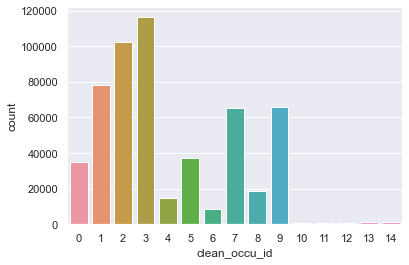

In [147]:
# Frequency distribution with one varaible
sns.countplot(data = combined_datafile , x = 'clean_occu_id')

<AxesSubplot:xlabel='clean_occu_id', ylabel='num_of_views'>

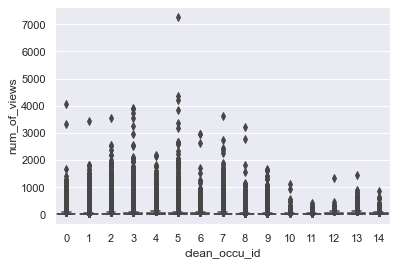

In [148]:
sns.boxplot(data = combined_datafile, x='clean_occu_id', y='num_of_views')

## A better way to analyse the data will be to look at the count plots and the box plots together, Other wise we will have to keep shuffling between the two Charts

<AxesSubplot:xlabel='clean_occu_id', ylabel='num_of_views'>

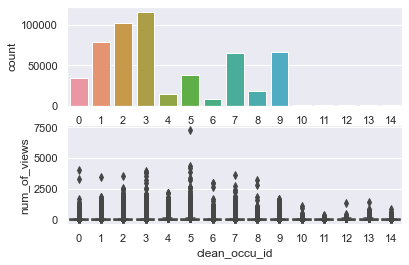

In [152]:
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1) 
sns.countplot(data = combined_datafile , x = 'clean_occu_id', ax = ax1)

ax2 = fig.add_subplot(2,1,2) 
sns.boxplot(data = combined_datafile , x = 'clean_occu_id', y='num_of_views' , ax = ax2)

## Below are the stacked representations of the countplots on single variables, 1. Occupation_id, 2. Sub_Region, 3. Continent  
## Below the count plots are box plots with the these variables in relationship to Number_of_views

<AxesSubplot:xlabel='continent_encoded', ylabel='num_of_views'>

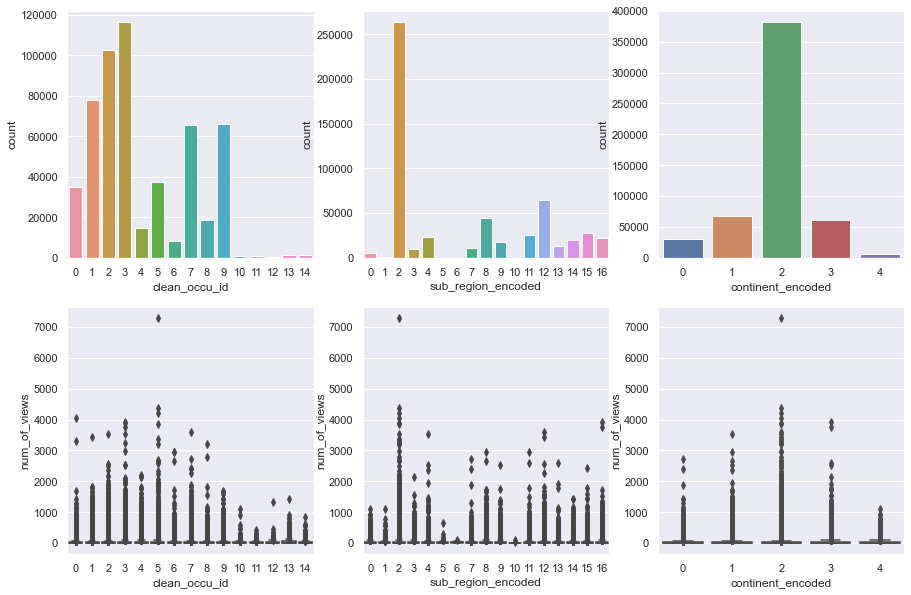

In [154]:
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = combined_datafile , x = 'clean_occu_id', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = combined_datafile , x = 'sub_region_encoded', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = combined_datafile , x = 'continent_encoded', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
sns.boxplot(data = combined_datafile, x='clean_occu_id', y='num_of_views' , ax=ax4)
#sns.violinplot(data = ds_cat, x = 'MSZoning', y = 'SalePrice' , ax=ax4)
#sns.swarmplot(data = ds_cat, x = 'MSZoning', y='SalePrice', color = 'k', alpha = 0.4, ax=ax4  )

ax5 = fig.add_subplot(2,3,5)
sns.boxplot(data = combined_datafile, x='sub_region_encoded', y='num_of_views', ax=ax5)
#sns.violinplot(data = ds_cat, x = 'LotShape', y = 'SalePrice', ax=ax5)
#sns.swarmplot(data = ds_cat, x = 'LotShape', y='SalePrice', color = 'k', alpha = 0.4, ax=ax5  )

ax6 = fig.add_subplot(2,3,6)
sns.boxplot(data = combined_datafile, x='continent_encoded', y='num_of_views', ax=ax6)
#sns.violinplot(data = ds_cat, x = 'LotConfig', y = 'SalePrice', ax=ax6)
#sns.swarmplot(data = ds_cat, x = 'LotConfig', y='SalePrice', color = 'k', alpha = 0.4, ax=ax6  )

### Encoding used for occupation
Commercial Scientist / Researcher -6,
Head of Department / Faculty - 11,
I'm just interested - 9,
Laboratory Director - 12,
Librarian / Information Specialist - 10,
Master Student - 2,
Medical Professional / Doctor - 7,
Not Mentioned - 0,
Other - 8,
PhD Student - 3,
Post Doc - 4,
Professor / Lecturer / PI - 5,
Research Director / VP Research - 14,
Senior Scientist - 13,
Undergraduate Student - 1

### Encoding used for Sub Regions
Australia and New Zealand - 0,
Central Asia - 1,
Eastern Asia - 2,
Eastern Europe - 3,
Latin America and the Caribbean - 4,
Melanesia - 5,
Micronesia - 6,
Northern Africa - 7,
Northern America - 8,
Northern Europe - 9,
Polynesia - 10,
South-eastern Asia - 11,
Southern Asia - 12,
Southern Europe - 13,
Sub-Saharan Africa - 14,
Western Asia - 15,
Western Europe - 16

### Encoding used for Continent
Africa - 0,
Americas - 1,
Asia - 2,
Europe - 3,
Oceania - 4

## From the above graphs we can conclude that the majority of people using the video streaming service are PhD students, Master's students, Professor / Lecturer / PI), followed closely by Undergraduate students, Medical professional/Doctors and so on.

## From the data we can also see that most number of visits and views are from continent of Asia more specifically the sub region of Eastern Asia (China , Honkong)

### We can definitely put weight on the insights that can be gained from an EDA like this. But derieving strategies for improvement on basis of this analysis can be misleading. This can be obtained using other machine learning algorithms